In [11]:

import tensorflow as tf
print(tf.__version__) 

ImportError: cannot import name 'LayerNormalization' from 'tensorflow.python.keras.layers.normalization' (C:\Anaconda\lib\site-packages\tensorflow\python\keras\layers\normalization\__init__.py)

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

import warnings # ignore warnings
warnings.filterwarnings('ignore')

* Регресія за допомогою засобів TensorFlow

In [29]:
market_collection = tf.constant(["apples", "bananas", "grapes" , "oranges"])
market_prices = tf.constant([1090])
market_collection, market_prices

(<tf.Tensor: shape=(4,), dtype=string, numpy=array([b'apples', b'bananas', b'grapes', b'oranges'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([1090], dtype=int32)>)

In [30]:
market_collection.shape

TensorShape([4])

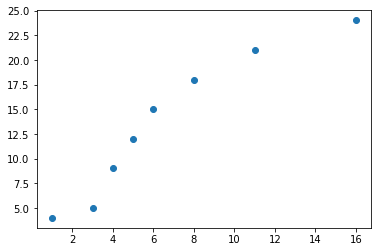

In [31]:
# Create features (using tensors)
X = tf.constant([1.0, 3.0, 4.0, 5.0, 6.0, 8.0, 11.0, 16.0])

# Create labels (using tensors)
y = tf.constant([4.0, 5.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y);

In [32]:
X[0], y[0]

(<tf.Tensor: shape=(), dtype=float32, numpy=1.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4.0>)

In [34]:
from tensorflow.python import pywrap_tensorflow as _pywrap_tensorflow
from tensorflow.python.eager import context
# Set random seed
tf.random.set_seed(50)

# Create a model using the Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent
              metrics=["mae"])

# Fit the model
model.fit(X, y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 1ms/step - loss: 3.2898 - mae: 3.2898
Epoch 2/5
1/1 [==============================] - 0s 2ms/step - loss: 3.2085 - mae: 3.2085
Epoch 3/5
1/1 [==============================] - 0s 864us/step - loss: 3.1273 - mae: 3.1273
Epoch 4/5
1/1 [==============================] - 0s 903us/step - loss: 3.0460 - mae: 3.0460
Epoch 5/5
1/1 [==============================] - 0s 911us/step - loss: 2.9648 - mae: 2.9648


In [35]:
X, y


(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 1.,  3.,  4.,  5.,  6.,  8., 11., 16.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 4.,  5.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [36]:

# Make a prediction with the model
model.predict([17.0])

array([[28.401976]], dtype=float32)

In [37]:
# Set random seed
tf.random.set_seed(50)

# Create a model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Fit model (this time we'll train for longer)
model.fit(X, y, epochs=100) # train for 100 epochs not 10

Epoch 1/100
1/1 [==============================] - 0s 2ms/step - loss: 3.2898 - mae: 3.2898
Epoch 2/100
1/1 [==============================] - 0s 19ms/step - loss: 3.2085 - mae: 3.2085
Epoch 3/100
1/1 [==============================] - 0s 930us/step - loss: 3.1273 - mae: 3.1273
Epoch 4/100
1/1 [==============================] - 0s 939us/step - loss: 3.0460 - mae: 3.0460
Epoch 5/100
1/1 [==============================] - 0s 947us/step - loss: 2.9648 - mae: 2.9648
Epoch 6/100
1/1 [==============================] - 0s 893us/step - loss: 2.8943 - mae: 2.8943
Epoch 7/100
1/1 [==============================] - 0s 825us/step - loss: 2.8518 - mae: 2.8518
Epoch 8/100
1/1 [==============================] - 0s 1ms/step - loss: 2.8093 - mae: 2.8093
Epoch 9/100
1/1 [==============================] - 0s 1ms/step - loss: 2.7668 - mae: 2.7668
Epoch 10/100
1/1 [==============================] - 0s 1ms/step - loss: 2.7243 - mae: 2.7243
Epoch 11/100
1/1 [==============================] - 0s 2ms/step - lo

In [38]:
model.predict([17.0])

array([[32.50691]], dtype=float32)

In [39]:
# Make a bigger dataset
X = np.arange(-100, 100, 4)
X

array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])

In [40]:
y = np.arange(-90, 110, 4)
y

array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

In [41]:
y = X + 10
y

array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

In [42]:
len(X)


50

In [43]:
X_train = X[:40] 
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]

len(X_train), len(X_test)

(40, 10)

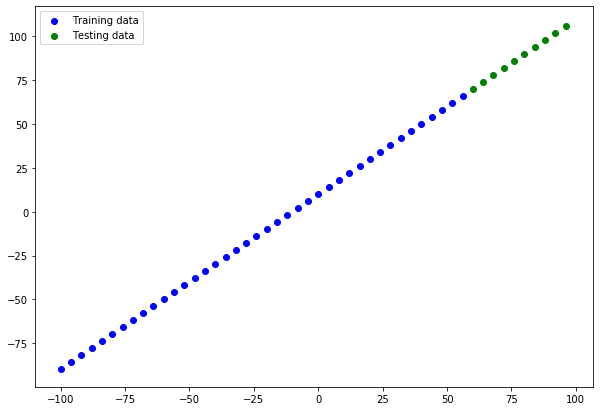

In [44]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, y_train, c='b', label='Training data')
# Plot test data in green
plt.scatter(X_test, y_test, c='g', label='Testing data')
# Show the legend
plt.legend();

In [46]:
# Set random seed
tf.random.set_seed(50)

# Create a model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

In [48]:
# Set random seed
tf.random.set_seed(50)

# Create a model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1, input_shape=[1]) # define the input_shape to our model
])

# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

In [49]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [50]:
# Fit the model to the training data
model.fit(X_train, y_train, epochs=100, verbose=0)

In [51]:
# Check the model summary
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [52]:
# Make predictions
y_preds = model.predict(X_test)
y_preds

array([[50.381172],
       [53.650166],
       [56.91916 ],
       [60.188156],
       [63.45715 ],
       [66.72615 ],
       [69.99514 ],
       [73.26414 ],
       [76.533134],
       [79.802124]], dtype=float32)

In [53]:
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=y_preds):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot the predictions in red (predictions were made on the test data)
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend();

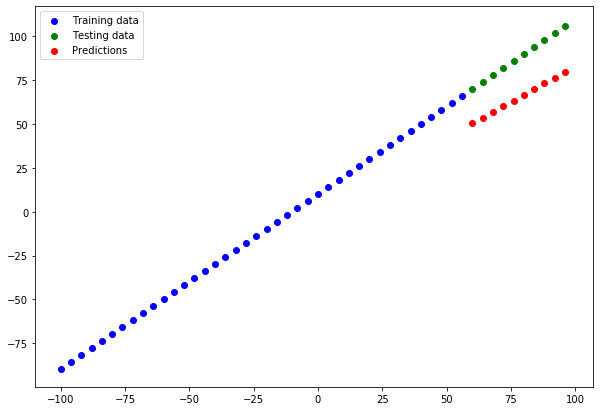

In [54]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_preds)

In [55]:
# Evaluate the model on the test set
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 2ms/step - loss: 22.9083 - mae: 22.9083


[22.908349990844727, 22.908349990844727]

In [56]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test, 
                                     y_pred=y_preds)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([37.618828, 34.349834, 31.080841, 27.811844, 24.54285 , 21.27385 ,
       18.00486 , 15.38869 , 13.280119, 11.679151], dtype=float32)>

In [57]:
y_test

array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

In [58]:
y_preds

array([[50.381172],
       [53.650166],
       [56.91916 ],
       [60.188156],
       [63.45715 ],
       [66.72615 ],
       [69.99514 ],
       [73.26414 ],
       [76.533134],
       [79.802124]], dtype=float32)

In [59]:
y_test.shape, y_preds.shape

((10,), (10, 1))

In [60]:
y_preds.squeeze().shape

(10,)

In [61]:
y_test, y_preds.squeeze()

(array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106]),
 array([50.381172, 53.650166, 56.91916 , 60.188156, 63.45715 , 66.72615 ,
        69.99514 , 73.26414 , 76.533134, 79.802124], dtype=float32))

In [62]:
# Calcuate the MAE
mae = tf.metrics.mean_absolute_error(y_true=y_test, 
                                     y_pred=y_preds.squeeze()) # use squeeze() to make same shape
mae

<tf.Tensor: shape=(), dtype=float32, numpy=22.90835>

In [63]:
# Calculate the MSE
mse = tf.metrics.mean_squared_error(y_true=y_test,
                                    y_pred=y_preds.squeeze())
mse

<tf.Tensor: shape=(), dtype=float32, numpy=529.20105>

In [64]:

# Returns the same as tf.metrics.mean_absolute_error()
tf.reduce_mean(tf.abs(y_test-y_preds.squeeze()))

<tf.Tensor: shape=(), dtype=float64, numpy=22.908351135253906>

* Класифікація за допомогою засобів TensorFlow

In [65]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 900

# Create circles
X, y = make_circles(n_samples, 
                    noise=0.05, 
                    random_state=50)

In [66]:
X

array([[ 0.21946596, -0.73023145],
       [-0.88973588,  0.48190767],
       [-1.0745381 ,  0.04491001],
       ...,
       [ 0.02719712,  1.00101687],
       [ 0.87275812,  0.31420186],
       [-0.83639058, -0.13614584]])

In [67]:
y[:10]

array([1, 0, 0, 0, 0, 1, 1, 1, 1, 1])

In [68]:

# Make dataframe of features and labels
import pandas as pd
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y})
circles.head()

,X0,X1,label
0,0.219466,-0.730231,1
1,-0.889736,0.481908,0
2,-1.074538,0.044910,0
3,0.880543,-0.579446,0
4,0.962754,0.120744,0


In [69]:
# Check out the different labels
circles.label.value_counts()

1    450
0    450
Name: label, dtype: int64

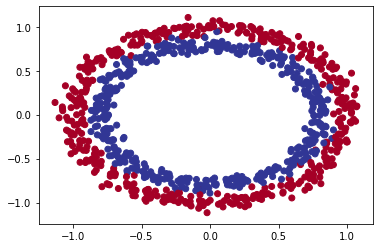

In [70]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

In [71]:
X.shape, y.shape

((900, 2), (900,))

In [72]:
len(X), len(y)

(900, 900)

In [73]:
# Set random seed
tf.random.set_seed(50)

# 1. Create the model using the Sequential API
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(), # binary since we are working with 2 clases (0 & 1)
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

# 3. Fit the model
model_1.fit(X, y, epochs=5)

Epoch 1/5
29/29 [==============================] - 0s 947us/step - loss: 5.7179 - accuracy: 0.4833
Epoch 2/5
29/29 [==============================] - 0s 1ms/step - loss: 5.4811 - accuracy: 0.4744
Epoch 3/5
29/29 [==============================] - 0s 3ms/step - loss: 5.9463 - accuracy: 0.4867
Epoch 4/5
29/29 [==============================] - 0s 852us/step - loss: 5.6637 - accuracy: 0.4989
Epoch 5/5
29/29 [==============================] - 0s 3ms/step - loss: 5.1921 - accuracy: 0.4944


In [75]:
# Train our model for longer (more chances to look at the data)
model_1.fit(X, y, epochs=200, verbose=0) # set verbose=0 to remove training updates
model_1.evaluate(X, y)

29/29 [==============================] - 0s 972us/step - loss: 0.6933 - accuracy: 0.4733


[0.6932616233825684, 0.47333332896232605]

In [76]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model (same as model_1 but with an extra layer)
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1), # add an extra layer
  tf.keras.layers.Dense(1) 
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

# 3. Fit the model
model_2.fit(X, y, epochs=100, verbose=0) # set verbose=0 to make the output print less

In [77]:
model_2.evaluate(X, y)

29/29 [==============================] - 0s 965us/step - loss: 0.6934 - accuracy: 0.5000


[0.6934237480163574, 0.5]

In [78]:
tf.random.set_seed(42)

# 1. Create the model (this time 3 layers)
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100), # add 100 dense neurons
  tf.keras.layers.Dense(10), # add another layer with 10 neurons
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(), # use Adam instead of SGD
                metrics=['accuracy'])

# 3. Fit the model
model_3.fit(X, y, epochs=100, verbose=0)

In [81]:
import numpy as np

def plot_decision_boundary(model, X, y):
  
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X values 
  x_in = np.c_[xx.ravel(), yy.ravel()] 
  
  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification...")

    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(y_pred).reshape(xx.shape)
  
  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

doing binary classifcation...


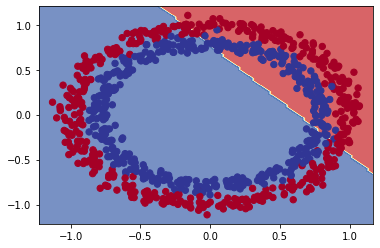

In [82]:
plot_decision_boundary(model_3, X, y)

In [84]:
tf.random.set_seed(50)

# Recreate the model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Change the loss and metrics of our compiled model
model_3.compile(loss=tf.keras.losses.mae, # change the loss function to be regression-specific
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae']) # change the metric to be regression-specific

# Fit the recompiled model
model_3.fit(X_reg_train, y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 0s 1ms/step - loss: 433.1741 - mae: 433.1741
Epoch 2/100
5/5 [==============================] - 0s 1ms/step - loss: 317.6062 - mae: 317.6062
Epoch 3/100
5/5 [==============================] - 0s 1ms/step - loss: 196.4216 - mae: 196.4216
Epoch 4/100
5/5 [==============================] - 0s 1ms/step - loss: 80.7397 - mae: 80.7397
Epoch 5/100
5/5 [==============================] - 0s 1ms/step - loss: 65.3981 - mae: 65.3981
Epoch 6/100
5/5 [==============================] - 0s 1ms/step - loss: 79.2315 - mae: 79.2315
Epoch 7/100
5/5 [==============================] - 0s 1ms/step - loss: 55.2278 - mae: 55.2278
Epoch 8/100
5/5 [==============================] - 0s 1ms/step - loss: 48.0362 - mae: 48.0362
Epoch 9/100
5/5 [==============================] - 0s 1ms/step - loss: 45.5234 - mae: 45.5234
Epoch 10/100
5/5 [==============================] - 0s 996us/step - loss: 42.7170 - mae: 42.7170
Epoch 11/100
5/5 [==============================] -

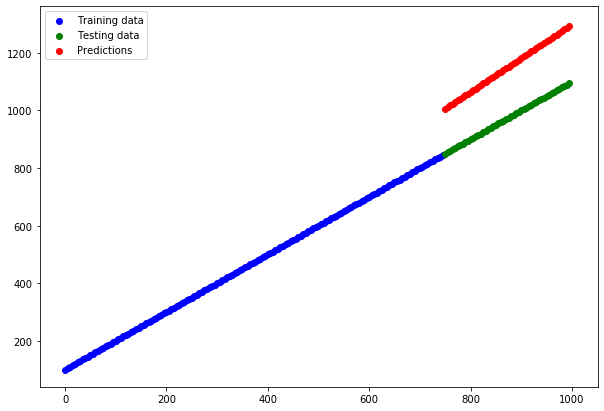

In [85]:
# Make predictions with our trained model
y_reg_preds = model_3.predict(y_reg_test)

# Plot the model's predictions against our regression data
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c='b', label='Training data')
plt.scatter(X_reg_test, y_reg_test, c='g', label='Testing data')
plt.scatter(X_reg_test, y_reg_preds.squeeze(), c='r', label='Predictions')
plt.legend();